# Simple linear regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,129,90,7,326,19.6,0.582,60,0
1,12,92,62,7,258,27.6,0.926,44,1
2,1,90,68,8,0,24.5,1.138,36,0
3,1,109,60,8,182,25.4,0.947,21,0
4,1,73,50,10,0,23.0,0.248,21,0


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# We want to use tricep skinfold measurments to predict BMI
# Y (BMI) is the dependent variable and the expected value of the outcome
# x (Skin Thickness) is the independent or predictor variable.

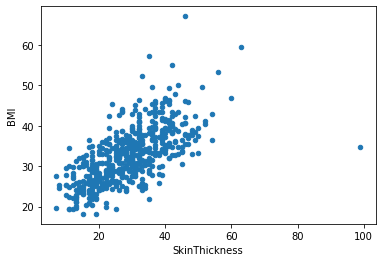

In [6]:
# Let's see if the data is linear
df.plot(kind = 'scatter', x='SkinThickness', y='BMI')
plt.show()

In [7]:
#from above, it looks like there is a positive relationship between the variables
# As under arm skin thickness increases, so does the BMI

In [8]:
# Test train split for supervised training
X_train, X_test, y_train, y_test = train_test_split(df.SkinThickness, df.BMI)


In [9]:
#Create linear model and train it
reg = LinearRegression()
reg.fit(X_train.values.reshape(-1, 1), y_train.values)

LinearRegression()

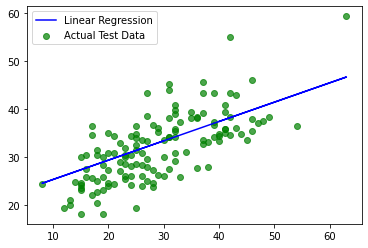

In [12]:
# Use model to predict on test data
prediction = reg.predict(X_test.values.reshape(-1, 1))

#Plot prediction line against actual test data
plt.plot(X_test, prediction, label="Linear Regression", color='b')
plt.scatter(X_test, y_test, label="Actual Test Data", color='g', alpha=.7)
plt.legend()
plt.show()

In [14]:
#To see how the model will predict BMI if a specific skin thickness of 50
reg.predict(np.array([[50]]))[0]
#You will have a BMI of 41.50 if your skin thickness is 50

41.499214928446925

In [15]:
#Score the model which is R squared score
reg.score(X_test.values.reshape(-1,1), y_test.values)

0.4685136568649394

In [16]:
# R-squared is the percentage of the dependent variable variation that a linear model explains
# usually the larger the better, so 47% of BMI (dependent variable y) is explained by SkinThickness (independent variable x)

In [17]:
#can also do R squared this way
print("Coefficient of determination: %.2f" % r2_score(y_test,prediction))

Coefficient of determination: 0.47


In [18]:
print("Coefficient: \n", reg.coef_)

Coefficient: 
 [0.40294826]


In [19]:
# For coefficients, For every unit increase in SkinThickness, BMI should increase by .40

In [20]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, prediction))

Mean squared error: 26.37


In [21]:
#We want MSE to be as low as possible to predict model fit